In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
pd.set_option('display.max_column' , None)

In [8]:
df = pd.read_csv("gurgaon_properties_cleaned_v2.csv").drop_duplicates()

In [9]:
df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dwarka expressway,Ansals Highland Park,1.20,6185.0,1940.0,Built Up area: 1940 (180.23 sq.m.),3,3,3+,4.0,NaN,Under Construction,NaN,1940.0,NaN,0,1,0,0,0,0,0
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,11.0,East,New Property,2786.0,NaN,NaN,0,1,0,0,1,0,86
2,flat,sector 51,Orchid Island4.2 ★,1.70,10651.0,1596.0,Carpet area: 1596 (148.27 sq.m.),3,4,3,2.0,West,Moderately Old,NaN,NaN,1596.0,0,0,1,1,0,0,90
3,flat,sohna road,Signature Global Park4.0 ★,0.72,5991.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,3.0,North-West,Relatively New,1210.0,NaN,NaN,0,0,0,1,0,0,158
4,house,sector 112,experion windchants,9.50,23457.0,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450...,5,5,3,2.0,NaN,Relatively New,NaN,7450.0,NaN,0,1,0,0,0,0,45


In [10]:
df.shape

(3675, 23)

In [11]:
df.columns

Index(['property_type', 'sector', 'society', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\607703594.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

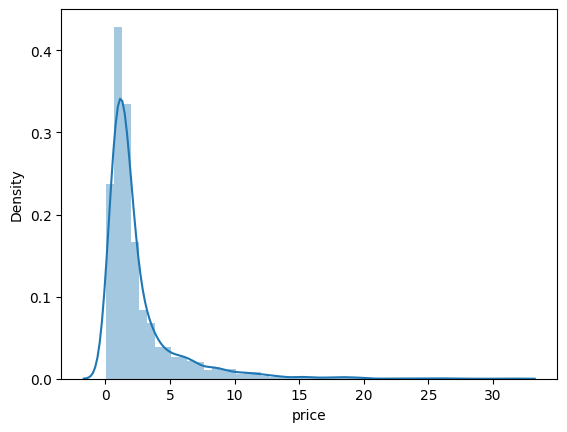

In [12]:
#Outliers on the basics of price column 
sns.distplot(df['price'])

<Axes: xlabel='price'>

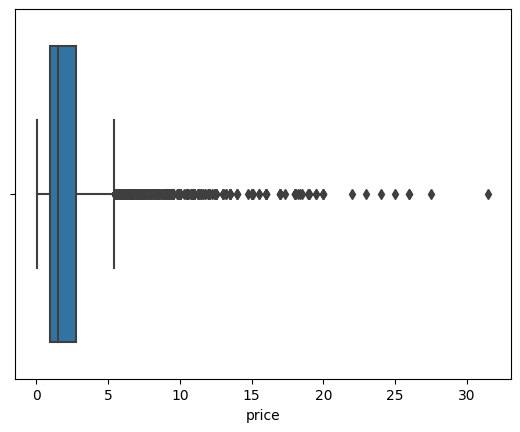

In [13]:
sns.boxplot(x=df['price'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [15]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
424,house,sector 26,arjun marg/ sector- 26 phase- 1/ golf course road,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
1750,house,sector 43,independent,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
364,house,sector 26,independent,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2357,house,sector 26,dlf city plots,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
3726,house,sector 54,suncity township,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
1064,house,sector 54,emaar the palm springs,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
3342,house,sector 26,independent,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
2964,house,sector 48,vipul tatvam villa,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
172,house,sector 26,independent,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
1273,house,sector 26,dlf city plots,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153


In [16]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

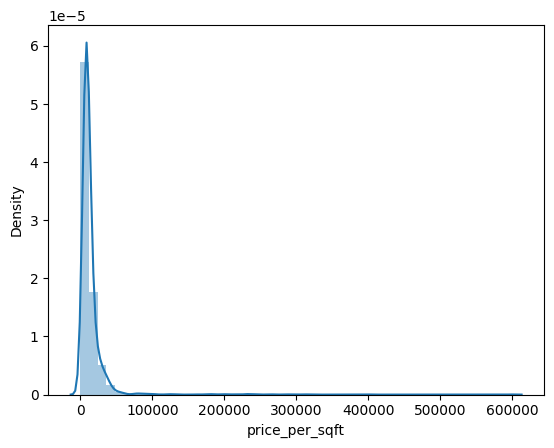

In [17]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

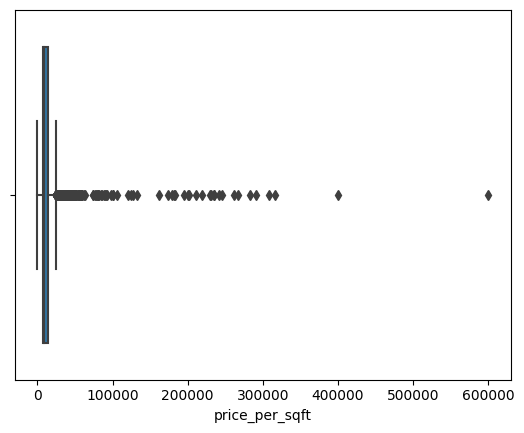

In [18]:
sns.boxplot(x=df['price_per_sqft'])

In [19]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [20]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [21]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [22]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [23]:
df.update(outliers_sqft)

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

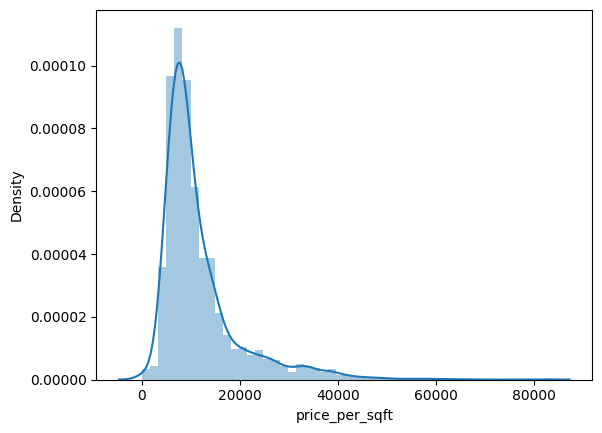

In [24]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

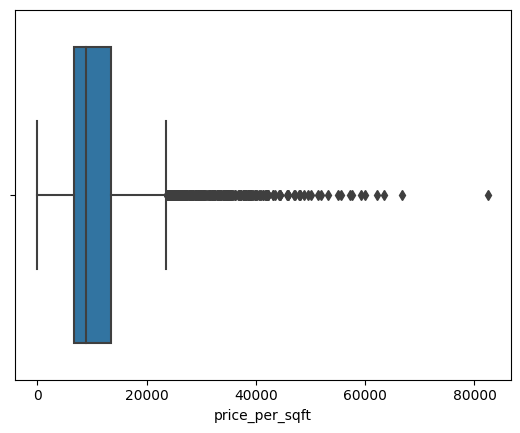

In [25]:
sns.boxplot(x=df['price_per_sqft'])

In [26]:
df[df['price_per_sqft']>50000]

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
364,house,sector 26,independent,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
425,house,sector 25,independent,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
1064,house,sector 54,emaar the palm springs,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
1180,house,sector 47,malibu towne,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
1447,house,sector 54,emaar the palm springs,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160
1669,house,sector 31,project housing board colony,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
1835,house,sector 28,nul,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137
2031,flat,sector 70,Unitech Vistas,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
2067,house,sector 26,independent,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,1,153
2357,house,sector 26,dlf city plots,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138


In [27]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

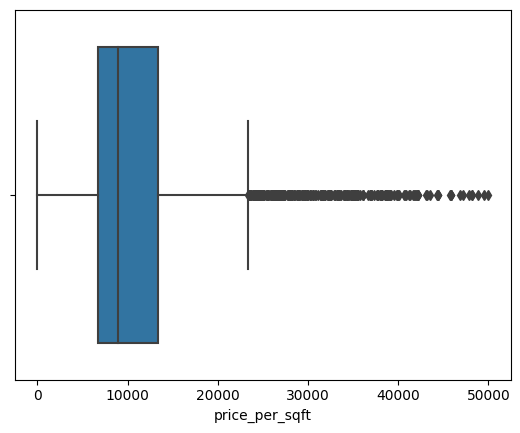

In [28]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

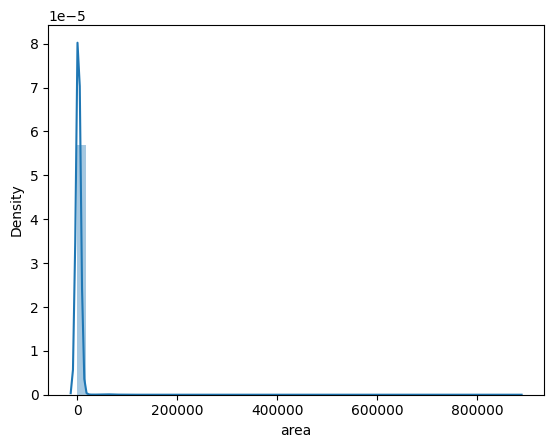

In [29]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

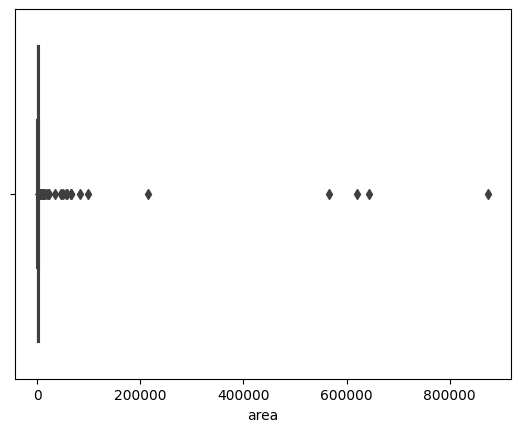

In [30]:
sns.boxplot(x=df['area'])

In [31]:
df['area'].describe()

count      3645.000000
mean       2948.372565
std       23214.540796
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [32]:
df[df['area'] > 100000]

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
592,house,sector 50,independent,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0
662,flat,sector 95,Ramsons Kshitij3.7 ★,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
1846,flat,sector 95,Signature The Roselia3.6 ★,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
2076,flat,sohna road,HCBS Sports Ville3.6 ★,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
3756,flat,sector 107,Signature Global Solera 2,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44


In [33]:
df = df[df['area'] < 100000]

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

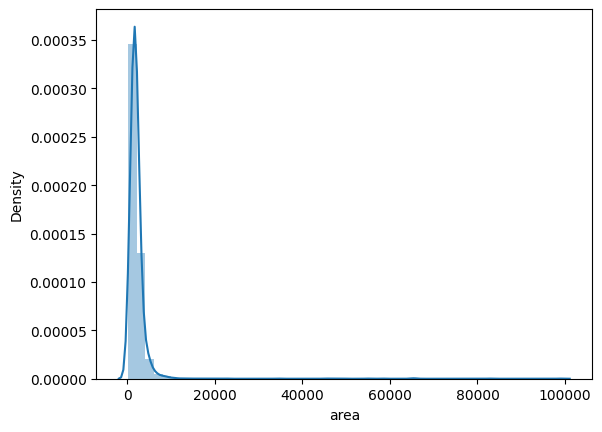

In [34]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

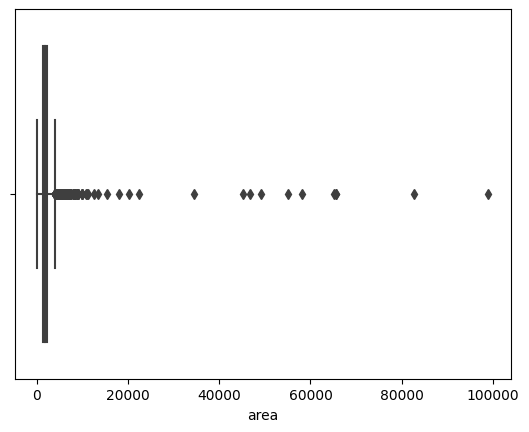

In [35]:
sns.boxplot(x=df['area'])

In [36]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1532,house,sector 26,independent,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
333,house,sector 13,ganpati heights apartment,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
3678,flat,sector 95,ROF Ananda,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1345,flat,sector 95,ROF Ananda,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
1427,house,sector 28,dlf city plot phase 4,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1743,flat,sector 86,Pyramid Elite,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
222,flat,sector 95,ROF Ananda,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
787,flat,sohna road,Signature The Serenas,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
3252,house,sector 25,independent,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3232,flat,sector 95,Ramsons Kshitij3.7 ★,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [37]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [38]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1532,house,sector 26,independent,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
333,house,sector 13,ganpati heights apartment,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
3678,flat,sector 95,ROF Ananda,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1345,flat,sector 95,ROF Ananda,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
1427,house,sector 28,dlf city plot phase 4,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1743,flat,sector 86,Pyramid Elite,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
222,flat,sector 95,ROF Ananda,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
787,flat,sohna road,Signature The Serenas,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
3252,house,sector 25,independent,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3232,flat,sector 95,Ramsons Kshitij3.7 ★,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [39]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

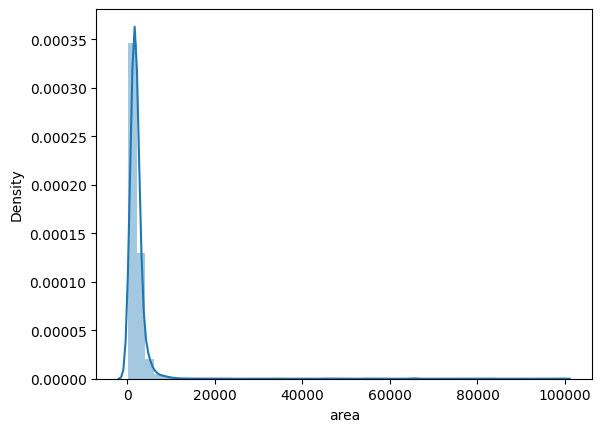

In [40]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

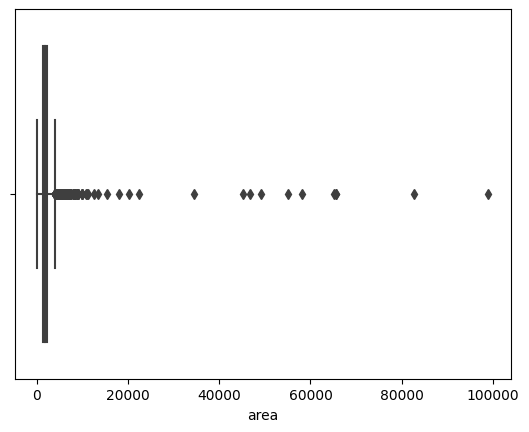

In [41]:
sns.boxplot(x=df['area'])

In [42]:
df['area'].describe()

count     3631.000000
mean      2153.790967
std       3630.202306
min        145.000000
25%       1261.500000
50%       1750.000000
75%       2343.500000
max      98978.000000
Name: area, dtype: float64

### Bedroom

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

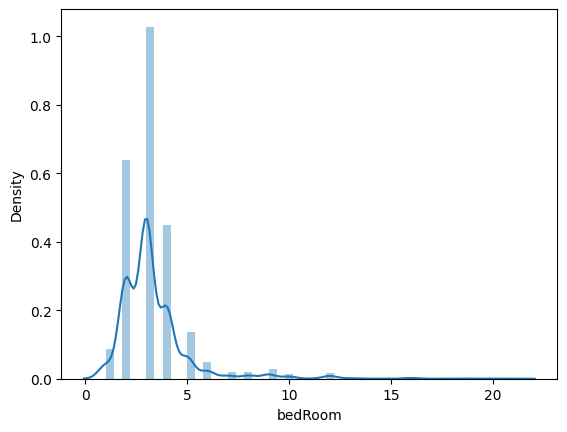

In [43]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

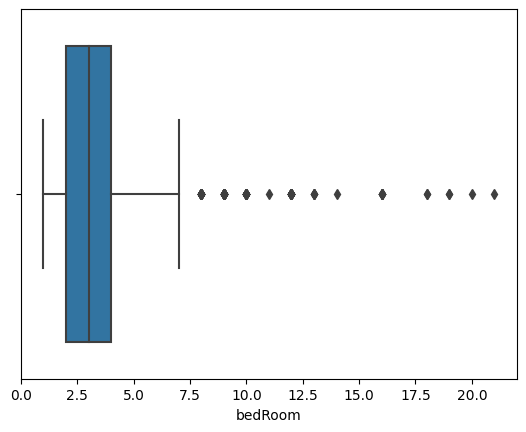

In [44]:
sns.boxplot(x=df['bedRoom'])

In [45]:
df['bedRoom'].describe()

count    3631.000000
mean        3.332415
std         1.831149
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [46]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3051,house,sector 54,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
546,house,sector 43,independent,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
3742,house,sector 17a,independent,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
3625,house,sector 17a,independent,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
1328,house,sector 55,private house,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
2022,house,sector 54,independent,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
2411,house,sector 26,luxury dlf city floors,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31
3086,house,sector 40,independent,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,1,0
1273,house,sector 26,dlf city plots,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
3740,house,sector 56,independent,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49


In [47]:
df = df[df['bedRoom'] <= 10]

In [48]:
df.shape

(3586, 23)

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

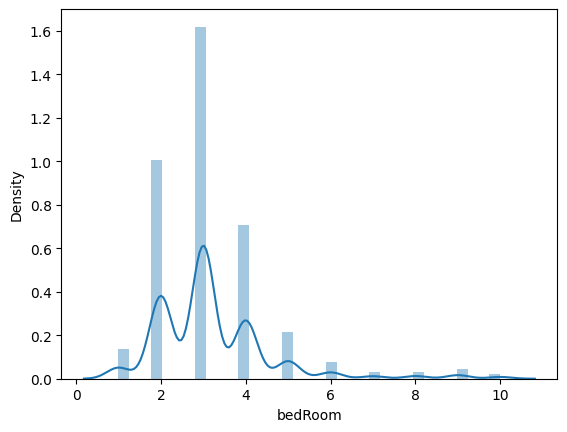

In [49]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

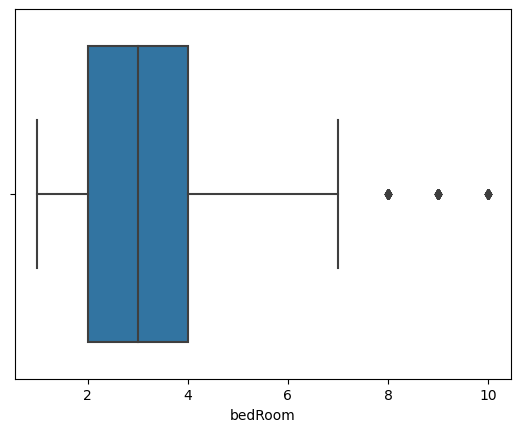

In [50]:
sns.boxplot(x=df['bedRoom'])

In [51]:
df['bedRoom'].describe()

count    3586.000000
mean        3.202454
std         1.395052
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom 

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

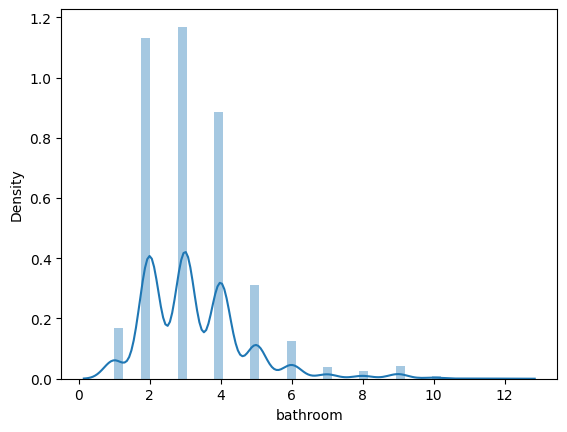

In [52]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

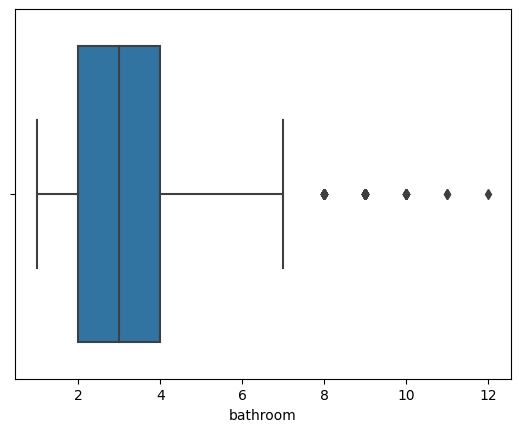

In [53]:
sns.boxplot(x=df['bathroom'])

In [54]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2601,house,sector 60,adani brahma samsara,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
3176,house,sector 24,independent,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39
3242,house,sector 39,independent,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38


In [55]:
df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dwarka expressway,Ansals Highland Park,1.20,6185.0,1940.0,Built Up area: 1940 (180.23 sq.m.),3,3,3+,4.0,NaN,Under Construction,NaN,1940.0,NaN,0,1,0,0,0,0,0
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,11.0,East,New Property,2786.0,NaN,NaN,0,1,0,0,1,0,86
3,flat,sohna road,Signature Global Park4.0 ★,0.72,5991.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,3.0,North-West,Relatively New,1210.0,NaN,NaN,0,0,0,1,0,0,158
4,house,sector 112,experion windchants,9.50,23457.0,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450...,5,5,3,2.0,NaN,Relatively New,NaN,7450.0,NaN,0,1,0,0,0,0,45
5,flat,sector 70a,BPTP Astaire Gardens3.7 ★,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4,4,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42


### Super built up area 

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

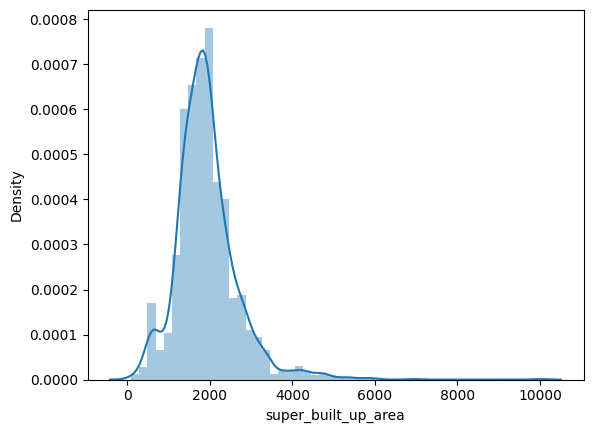

In [56]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

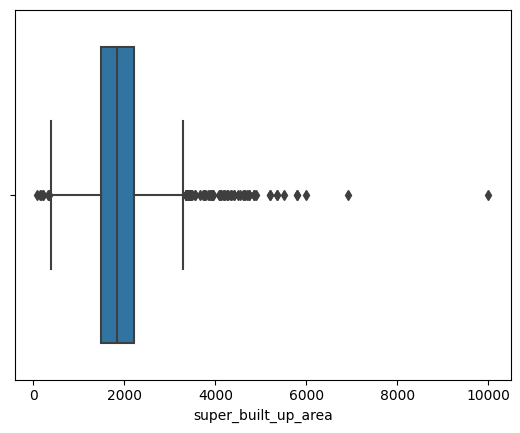

In [58]:
sns.boxplot(x=df['super_built_up_area'])

In [59]:
df['super_built_up_area'].describe()

count     1872.000000
mean      1925.251362
std        764.294561
min         89.000000
25%       1479.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [60]:
df[df['super_built_up_area'] > 6000]

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
158,flat,sector 81,Bestech Park View Grand Spa4.3 ★,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
884,flat,gwal pahari,Krrish Provence Estate,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


### built up area

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

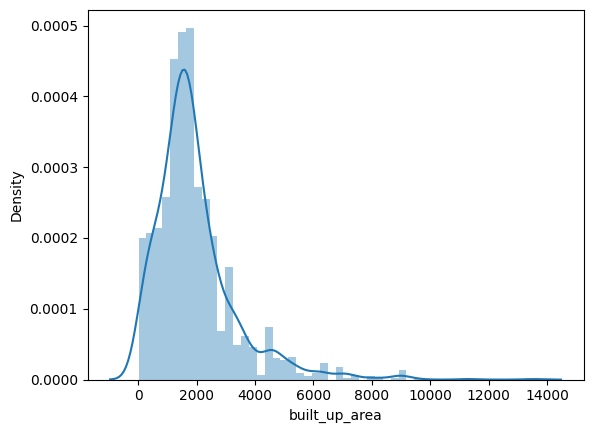

In [61]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

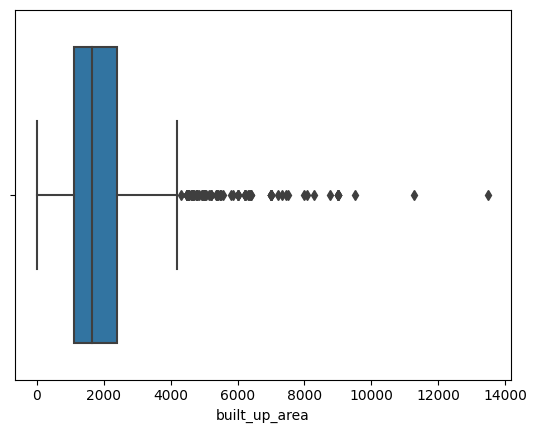

In [62]:
sns.boxplot(x=df['built_up_area'])

In [63]:
df[df['built_up_area'] > 10000]

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
310,house,sector 4,independent,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,0,0
1750,house,sector 43,independent,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


### carpet area

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

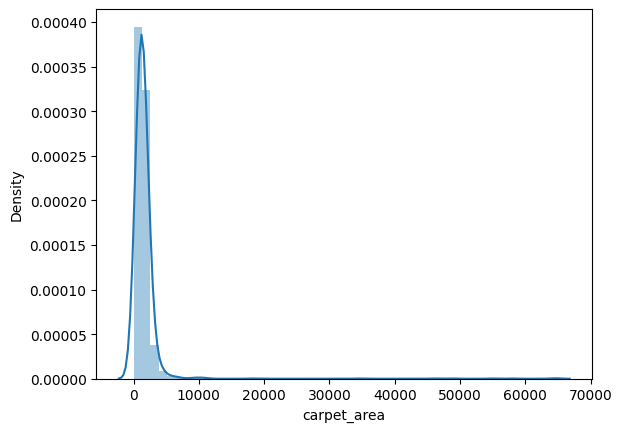

In [64]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

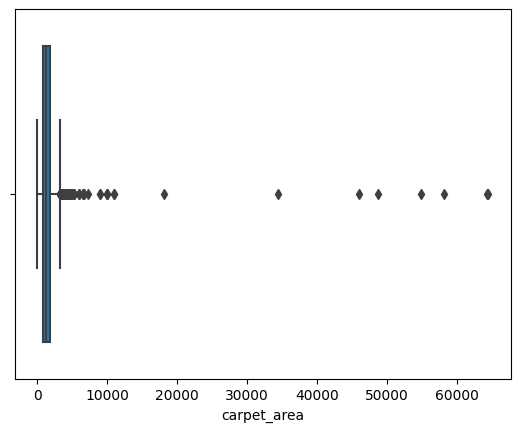

In [65]:
sns.boxplot(x=df['carpet_area'])

In [66]:
df[df['carpet_area'] > 10000]

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
222,flat,sector 95,ROF Ananda,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,0,37
787,flat,sohna road,Signature The Serenas,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,0,37
895,flat,sector 65,M3M Golfestate4.4 ★,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
921,flat,sector 85,Godrej Air,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
1345,flat,sector 95,ROF Ananda,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,0,51
1532,house,sector 26,independent,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60
1743,flat,sector 86,Pyramid Elite,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
2890,flat,sector 95,ROF Ananda,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68
3232,flat,sector 95,Ramsons Kshitij3.7 ★,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,0,33
3678,flat,sector 95,ROF Ananda,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,0,15


In [67]:
df.loc[2131,'carpet_area'] = 1812

In [68]:
df[df['carpet_area'] > 10000]

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
222,flat,sector 95,ROF Ananda,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,0,37
787,flat,sohna road,Signature The Serenas,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,0,37
895,flat,sector 65,M3M Golfestate4.4 ★,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
921,flat,sector 85,Godrej Air,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
1345,flat,sector 95,ROF Ananda,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,0,51
1532,house,sector 26,independent,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60
1743,flat,sector 86,Pyramid Elite,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
2890,flat,sector 95,ROF Ananda,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68
3232,flat,sector 95,Ramsons Kshitij3.7 ★,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,0,33
3678,flat,sector 95,ROF Ananda,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,0,15


In [69]:
df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dwarka expressway,Ansals Highland Park,1.20,6185.0,1940.0,Built Up area: 1940 (180.23 sq.m.),3,3,3+,4.0,NaN,Under Construction,NaN,1940.0,NaN,0,1,0,0,0,0,0
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,11.0,East,New Property,2786.0,NaN,NaN,0,1,0,0,1,0,86
3,flat,sohna road,Signature Global Park4.0 ★,0.72,5991.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,3.0,North-West,Relatively New,1210.0,NaN,NaN,0,0,0,1,0,0,158
4,house,sector 112,experion windchants,9.50,23457.0,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450...,5,5,3,2.0,NaN,Relatively New,NaN,7450.0,NaN,0,1,0,0,0,0,45
5,flat,sector 70a,BPTP Astaire Gardens3.7 ★,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4,4,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42


C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

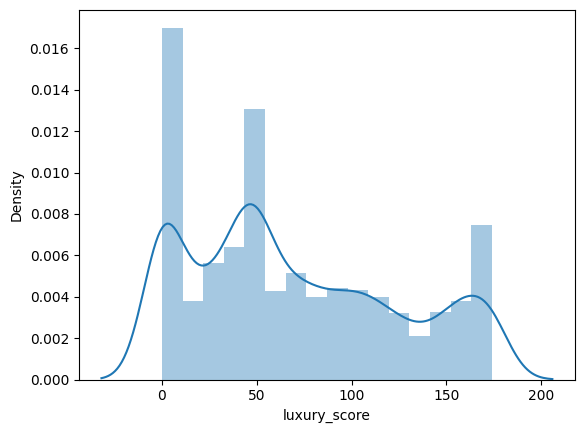

In [70]:
sns.distplot(df['luxury_score'])

<Axes: >

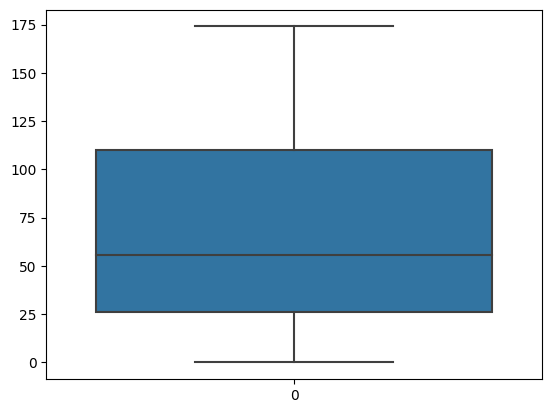

In [71]:
sns.boxplot(df['luxury_score'])

In [72]:
df.shape

(3586, 23)

In [73]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [74]:
df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dwarka expressway,Ansals Highland Park,1.20,6186.0,1940.0,Built Up area: 1940 (180.23 sq.m.),3,3,3+,4.0,NaN,Under Construction,NaN,1940.0,NaN,0,1,0,0,0,0,0
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,11.0,East,New Property,2786.0,NaN,NaN,0,1,0,0,1,0,86
3,flat,sohna road,Signature Global Park4.0 ★,0.72,5990.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,3.0,North-West,Relatively New,1210.0,NaN,NaN,0,0,0,1,0,0,158
4,house,sector 112,experion windchants,9.50,23457.0,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450...,5,5,3,2.0,NaN,Relatively New,NaN,7450.0,NaN,0,1,0,0,0,0,45
5,flat,sector 70a,BPTP Astaire Gardens3.7 ★,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4,4,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42


C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

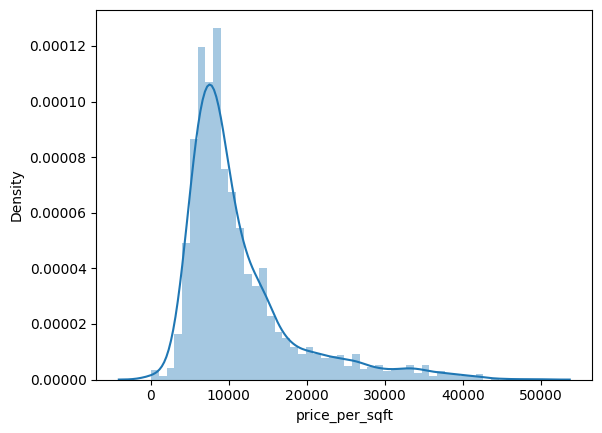

In [75]:
sns.distplot(df['price_per_sqft'])

<Axes: >

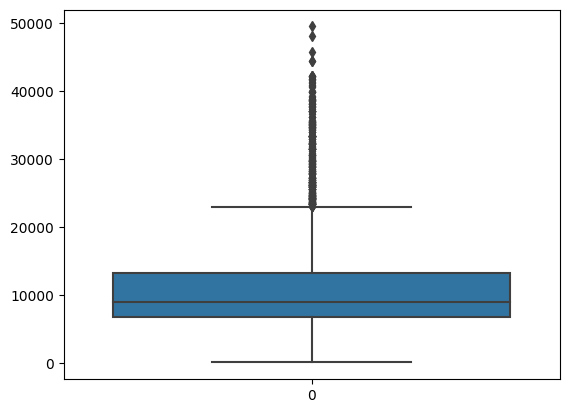

In [76]:
sns.boxplot(df['price_per_sqft'])

In [77]:
df[df['price_per_sqft'] > 42000]

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
172,house,sector 26,independent,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
201,house,sector 55,independent,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
910,house,sector 25,independent,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0
1346,house,sector 43,independent,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
1640,house,sector 26,independent,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
2292,house,sector 43,sushant lok 1 builder floors,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
2379,house,sector 28,independent,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
2426,house,sector 26,dlf city plots,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
3059,house,sector 105,independent,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0


In [78]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

186.0

In [79]:
df[(df['area']/df['bedRoom'])<183]

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
19,house,ravi nagar,independent,0.42,9333.0,450.0,Built Up area: 450 (41.81 sq.m.),5,3,2,2.0,NaN,Undefined,NaN,450.0,NaN,0,0,0,0,0,0,0
55,house,dwarka expressway,rattan vihar rajendra park,0.85,14167.0,600.0,Plot area 600(55.74 sq.m.),5,5,3+,4.0,NaN,New Property,NaN,600.0,NaN,0,0,0,0,0,0,0
187,house,sector 104,shri shyam residency,0.62,12400.0,500.0,Plot area 500(46.45 sq.m.)Built Up area: 900 s...,3,3,1,2.0,NaN,Moderately Old,NaN,900.0,480.0,0,0,0,0,1,2,8
201,house,sector 55,independent,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
216,house,surya vihar,independent,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3,2,1,1.0,NaN,Undefined,NaN,NaN,535.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,house,sector 7,rattan garden,0.83,17585.0,472.0,Carpet area: 472 (43.85 sq.m.),5,3,2,3.0,East,Undefined,NaN,NaN,472.0,0,0,0,0,0,0,0
3636,house,sector 57,sector 57 huda,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,4.0,East,Relatively New,NaN,162.0,160.0,0,0,1,1,0,1,94
3642,house,sector 12,bhawani enclave,0.42,8235.0,510.0,Plot area 565(52.49 sq.m.)Carpet area: 510 sq....,3,3,0,2.0,East,New Property,NaN,NaN,510.0,0,0,0,1,0,0,0
3677,house,sector 3 phase 3 extension,independent,0.50,11111.0,450.0,Plot area 450(41.81 sq.m.),5,3,3,3.0,NaN,Moderately Old,NaN,450.0,NaN,0,0,0,0,0,0,0


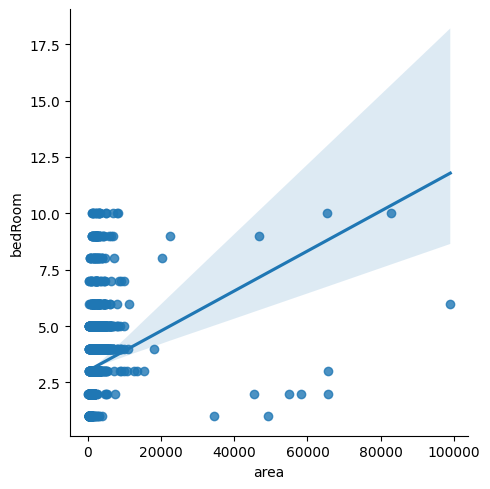

In [80]:
sns.lmplot(data=df,x="area",y="bedRoom")

In [81]:
df["area_room_ratio"] = df["area"]/df["bedRoom"]

In [82]:
df[df["area_room_ratio"]<250]["bedRoom"].value_counts()

bedRoom
2     47
3     33
5     28
6     17
4     17
9     15
8     12
7      8
10     7
Name: count, dtype: int64

In [83]:
df = df[df["area_room_ratio"]>100]

In [84]:
outlier_df = df[(df["area_room_ratio"]<250) & (df["bedRoom"]>3)]

In [85]:
outlier_df["bedRoom"] = round(outlier_df["bedRoom"]/outlier_df["floorNum"])

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\770241914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df["bedRoom"] = round(outlier_df["bedRoom"]/outlier_df["floorNum"])


In [86]:
df.update(outlier_df)

In [87]:
df["area_room_ratio"] = df["area"]/df["bedRoom"]

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_3608\591481648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area_room_ratio"] = df["area"]/df["bedRoom"]


In [88]:
df[(df["area_room_ratio"]<250) & (df["bedRoom"]>4)]

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
422,house,sector 12,independent,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
517,house,sector 3 phase 2,independent,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
679,house,sector 3 phase 2,independent,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
918,house,manesar,independent,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0,150.000000
981,house,sector 2,independent,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
1082,house,sector 105,independent,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
1227,house,sector 11,independent,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
1417,house,sector 7,shivpuri,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
1612,house,sector 7,independent,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
1704,house,sector 17,independent,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000


In [89]:
df[(df["area_room_ratio"]<250) & (df["bedRoom"]>4)].shape

(13, 24)

In [90]:
df.shape

(3566, 24)

In [91]:
df = df[~((df["area_room_ratio"]<250) & (df["bedRoom"]>4))]

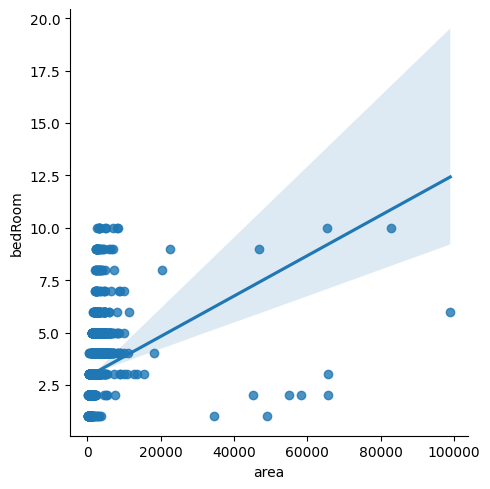

In [92]:
sns.lmplot(data = df,x = "area",y="bedRoom")

In [93]:
df.shape

(3553, 24)

In [94]:
df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,dwarka expressway,Ansals Highland Park,1.20,6186.0,1940.0,Built Up area: 1940 (180.23 sq.m.),3,3,3+,4.0,NaN,Under Construction,NaN,1940.0,NaN,0,1,0,0,0,0,0,646.666667
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,11.0,East,New Property,2786.0,NaN,NaN,0,1,0,0,1,0,86,696.500000
3,flat,sohna road,Signature Global Park4.0 ★,0.72,5990.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,3.0,North-West,Relatively New,1210.0,NaN,NaN,0,0,0,1,0,0,158,601.000000
4,house,sector 112,experion windchants,9.50,23457.0,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450...,5,5,3,2.0,NaN,Relatively New,NaN,7450.0,NaN,0,1,0,0,0,0,45,810.000000
5,flat,sector 70a,BPTP Astaire Gardens3.7 ★,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4,4,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42,462.000000


In [95]:
df.to_csv("gurgaon_properties_outlier_treated.csv",index = False)